In [1]:
import geopandas as gpd

c:\Users\aky\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\aky\AppData\Local\Temp\ipykernel_8860\3841419929.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://sh

In [2]:
# Importing an ESRI shapefile
states = gpd.read_file("C:/Users/aky/Documents/Programs/Geospatial/data/StatPlanet_Australia/australia/web/map/map.shp")
states.head()

,SA4_CODE11,SA4_NAME11,GCC_CODE11,GCC_NAME11,STE_CODE11,STE_NAME11,ALBERS_SQM,geometry
0,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,5.189451e+10,"POLYGON ((149.97668 -37.50506, 149.95885 -37.4..."
1,102,Central Coast,1GSYD,Greater Sydney,1,New South Wales,1.680860e+09,"POLYGON ((151.06845 -33.46010, 151.06399 -33.4..."
2,103,Central West,1RNSW,Rest of NSW,1,New South Wales,7.029781e+10,"POLYGON ((149.84205 -31.98391, 149.83912 -31.9..."
3,104,Coffs Harbour - Grafton,1RNSW,Rest of NSW,1,New South Wales,1.322978e+10,"POLYGON ((152.55852 -28.99008, 152.61699 -28.9..."
4,105,Far West and Orana,1RNSW,Rest of NSW,1,New South Wales,3.393643e+11,"POLYGON ((146.09495 -33.27596, 146.07658 -33.2..."


In [3]:
type(states)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

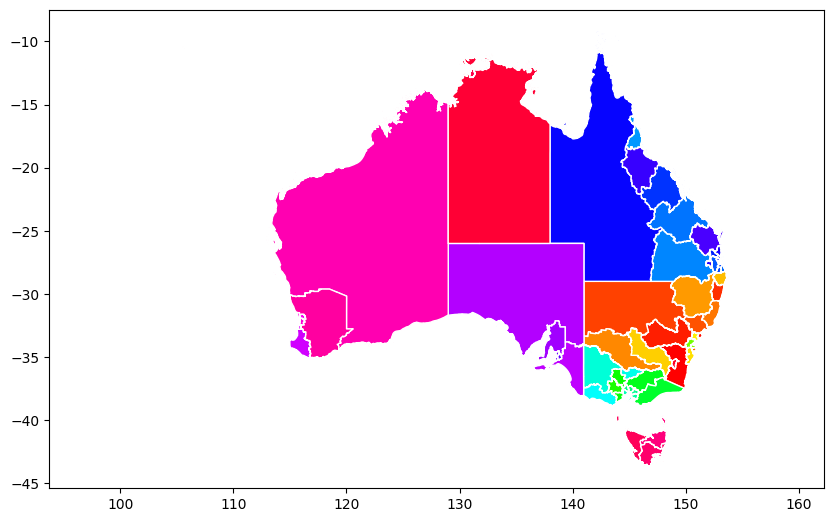

In [5]:
# Plotting using GeoPandas
states.plot(cmap='hsv', edgecolor='white', figsize=(10,10))

In [7]:
import matplotlib.pyplot as plt

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(10,10))
states.plot(ax = ax2, cmap='hsv', edgecolor='white', column='STATE_NAME')
states.plot(ax = ax2, color='red', alpha=0.5)

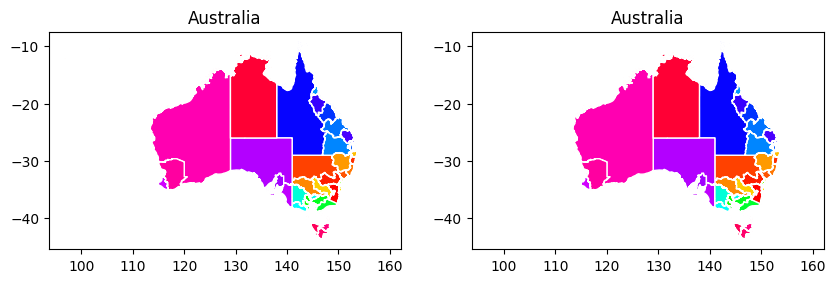

In [8]:
# Plot the figures side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
states.plot(ax=ax[0], cmap='hsv', edgecolor='white')
states.plot(ax=ax[1], cmap='hsv', edgecolor='white')
ax[0].set_title('Australia')
ax[1].set_title('Australia')
plt.show()

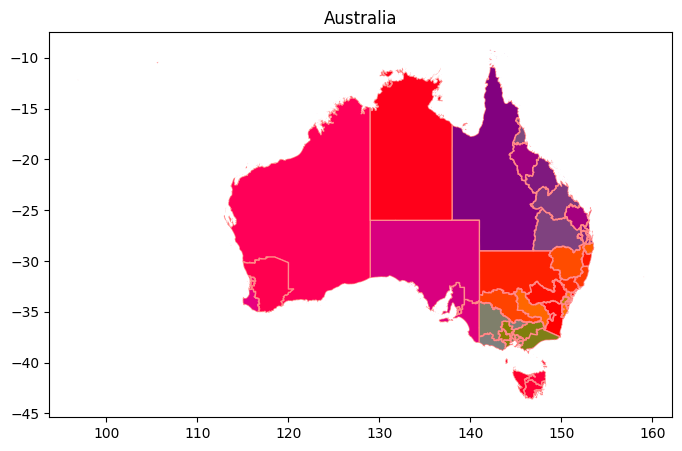

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
states.plot(ax=ax, cmap='hsv', edgecolor='white')
states.plot(ax=ax, color='red', alpha=0.5) # Plot the states on top of the map # or plot another GeoDataFrame
ax.set_title('Australia')
plt.show()

In [14]:
states.crs

<Geographic 2D CRS: GEOGCS["GRS 1980(IUGG, 1980)",DATUM["D_unknown",SP ...>
Name: GRS 1980(IUGG, 1980)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich

In [16]:
# Reprojecting GeoPandas GeoDataFrames
states_2 = states.to_crs(epsg = 32629)
states_2.crs

<Projected CRS: EPSG:32629>
Name: WGS 84 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°W and 6°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Côte D'Ivoire (Ivory Coast). Faroe Islands. Guinea. Ireland. Jan Mayen. Mali. Mauritania. Morocco. Portugal. Sierra Leone. Spain. United Kingdom (UK). Western Sahara.
- bounds: (-12.0, 0.0, -6.0, 84.0)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

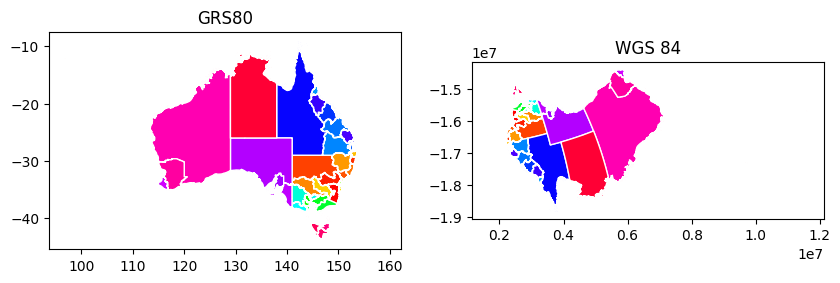

In [17]:
# Plot the figures side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
states.plot(ax=ax[0], cmap='hsv', edgecolor='white')
states_2.plot(ax=ax[1], cmap='hsv', edgecolor='white')
ax[0].set_title('GRS80')
ax[1].set_title('WGS 84')
plt.show()

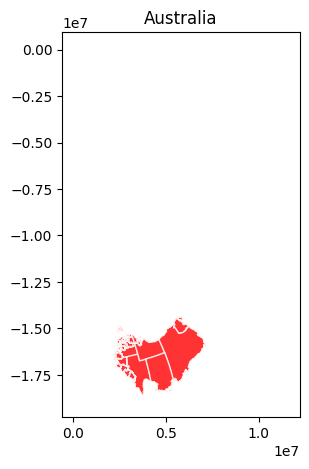

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
states.plot(ax=ax, color='blue', edgecolor='white', alpha=0.8)
states_2.plot(ax=ax, color='red', edgecolor='white', alpha=0.8)
ax.set_title('Australia')
plt.show()

In [ ]:
# Intersecting Layers
